<a href="https://colab.research.google.com/github/CHENNURUHARISH/23024881-CLUSTERING-FITTING/blob/main/PLANT_DISEASEEXPERMENT_(2)_ACHEIEVE_BEST_AS_OF_NOW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Mar 26 20:35:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [56]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


















# Data Preprocessing
# Train image Processing

In [57]:

### Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomlya
    RandomZoom(0.2),

])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# # Apply Data Augmentation & Normalization
# train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
# valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

In [58]:

# Load training dataset from directory (variable name: train_ds)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",  # Direct path to training images
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


# Load validation dataset from directory (variable name: valid_ds)
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Direct path to validation images
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,  # No shuffling for validation set
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


# Print class names for both training and validation sets
print("Training Set Classes:", train_dataset.class_names)
#print("Validation Set Classes:", valid_ds.class_names)

# Apply data augmentation & normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))



Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

In [59]:

train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 37), dtype=tf.float32, name=None))>

In [60]:

for x,y in train_dataset:
  print(x, x.shape)
  print(y, y.shape)
  break

tf.Tensor(
[[[[0.32143974 0.47597432 0.16121936]
   [0.31536937 0.45005417 0.15437403]
   [0.33752662 0.43711752 0.18307021]
   ...
   [0.48518264 0.48531353 0.35279027]
   [0.49841553 0.5440388  0.3497488 ]
   [0.46422148 0.5614709  0.2974611 ]]

  [[0.3111651  0.4469507  0.16167384]
   [0.37452704 0.4841422  0.23497444]
   [0.42772156 0.49140957 0.2949855 ]
   ...
   [0.49974447 0.54122156 0.35206482]
   [0.4757902  0.560588   0.3310424 ]
   [0.4061312  0.5308259  0.26020727]]

  [[0.3956658  0.51686186 0.2716103 ]
   [0.46728837 0.55390656 0.35075787]
   [0.45208496 0.43958473 0.31937122]
   ...
   [0.4472298  0.53433096 0.29429245]
   [0.43371317 0.5320813  0.28078514]
   [0.40185535 0.5169892  0.24724083]]

  ...

  [[0.27511472 0.42131168 0.10583632]
   [0.29027343 0.43363786 0.12892637]
   [0.3067592  0.42770156 0.16246454]
   ...
   [0.30960563 0.3432481  0.2075016 ]
   [0.29831737 0.41946474 0.17301491]
   [0.27018043 0.42034262 0.12861013]]

  [[0.27432135 0.41929212 0.111363

In [61]:

cnn = tf.keras.models.Sequential()

# MODEL

In [62]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [63]:


cnn= Sequential()

In [64]:

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [65]:



cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [66]:


cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [67]:



cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [68]:


cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



In [69]:




cnn.add(tf.keras.layers.Dropout(0.25))

In [70]:

cnn.add(tf.keras.layers.Flatten())


In [80]:

cnn.add(tf.keras.layers.Dense(units=1400,activation='relu'))


In [81]:


cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [82]:

#Output Layer
cnn.add(tf.keras.layers.Dense(units=37,activation='softmax'))


## **Compiling and Training Phase**


In [83]:


cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:

cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 37)                  │          44,437 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1400)                │          53,200 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,320,498 (27.93 MB)

 Trainable params: 7,320,498 (27.93 MB)

 Non-trainable params: 0 (0.00 B)

**MODEL** **TRAINING**

In [85]:

training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=30)

Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 210ms/step - accuracy: 0.0866 - loss: 3.5464 - val_accuracy: 0.1180 - val_loss: 3.3958
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.1336 - loss: 3.2768 - val_accuracy: 0.1488 - val_loss: 3.0738
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.1567 - loss: 3.0354 - val_accuracy: 0.1841 - val_loss: 2.8558
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.2006 - loss: 2.7951 - val_accuracy: 0.1944 - val_loss: 2.7009
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.2408 - loss: 2.5175 - val_accuracy: 0.2897 - val_loss: 2.4397
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.2730 - loss: 2.3670 - val_accuracy: 0.2992 - val_loss: 2.2390
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.3230 - loss: 2.1922 - val_accuracy: 0.3175 - val_loss: 2.2931
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.3462 - loss: 2

In [86]:

 #Training set Accuracy
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)


120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.7488 - loss: 0.7737
Training accuracy: 0.7630406022071838


In [87]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6883 - loss: 1.0439
Validation accuracy: 0.7045092582702637


## **SAVING MODEL**

In [88]:
cnn.save('trained_plant_disease_model.keras')
training_history.history #Return Dictionary of history

{'accuracy': [0.11035386472940445,
  0.13132372498512268,
  0.1758846640586853,
  0.20760157704353333,
  0.25557011365890503,
  0.28309306502342224,
  0.3271297514438629,
  0.35648754239082336,
  0.38741809129714966,
  0.4144167900085449,
  0.42359107732772827,
  0.4422018229961395,
  0.47051113843917847,
  0.49724769592285156,
  0.5342071056365967,
  0.5158584713935852,
  0.558846652507782,
  0.5730013251304626,
  0.5918741822242737,
  0.6007863879203796,
  0.6057667136192322,
  0.6152031421661377,
  0.6277850866317749,
  0.6605504751205444,
  0.6762778759002686,
  0.6820445656776428,
  0.6849279403686523,
  0.6851900219917297,
  0.7038007974624634,
  0.7239843010902405],
 'loss': [3.4773569107055664,
  3.2292964458465576,
  2.9588863849639893,
  2.726799726486206,
  2.458143949508667,
  2.3123672008514404,
  2.1632916927337646,
  2.069098711013794,
  1.9319463968276978,
  1.840563416481018,
  1.8262578248977661,
  1.7208038568496704,
  1.655869722366333,
  1.5748733282089233,
  1.481

In [89]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


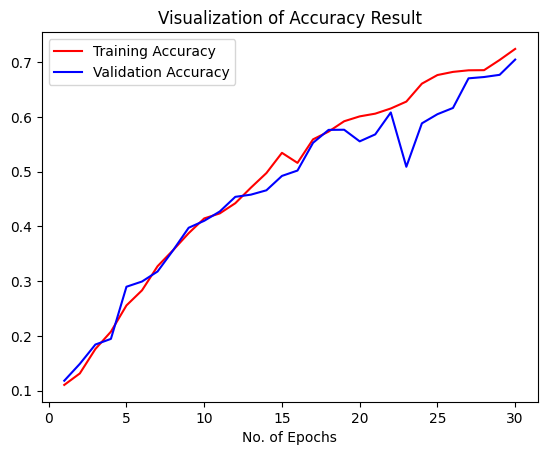

In [90]:
# epochs = range(1, len(training_history.history['accuracy']) + 1)
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### OTHER METRICS FOR EVALUATION


In [ ]:

test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Direct path to validation images
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Correct way to get class names
class_names = test_set.class_names
print(class_names)  # Check the class names


Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

3770/3770 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


<tf.Tensor: shape=(3770,), dtype=int64, numpy=array([25, 20,  1, ..., 36, 24, 17])>

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(3770,), dtype=int64, numpy=array([ 0,  0,  0, ..., 36, 36, 36])>

In [ ]:

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.38      0.74      0.50       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.08      0.11      0.09       109
                               Blueberry___healthy       0.18      0.33      0.23       100
          Cherry_(including_sour)___Powdery_mildew       0.15      0.07      0.10       100
                 Cherry_(including_sour)___healthy       0.36      0.24      0.28       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.23      0.24      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CONFUSION MATRIX


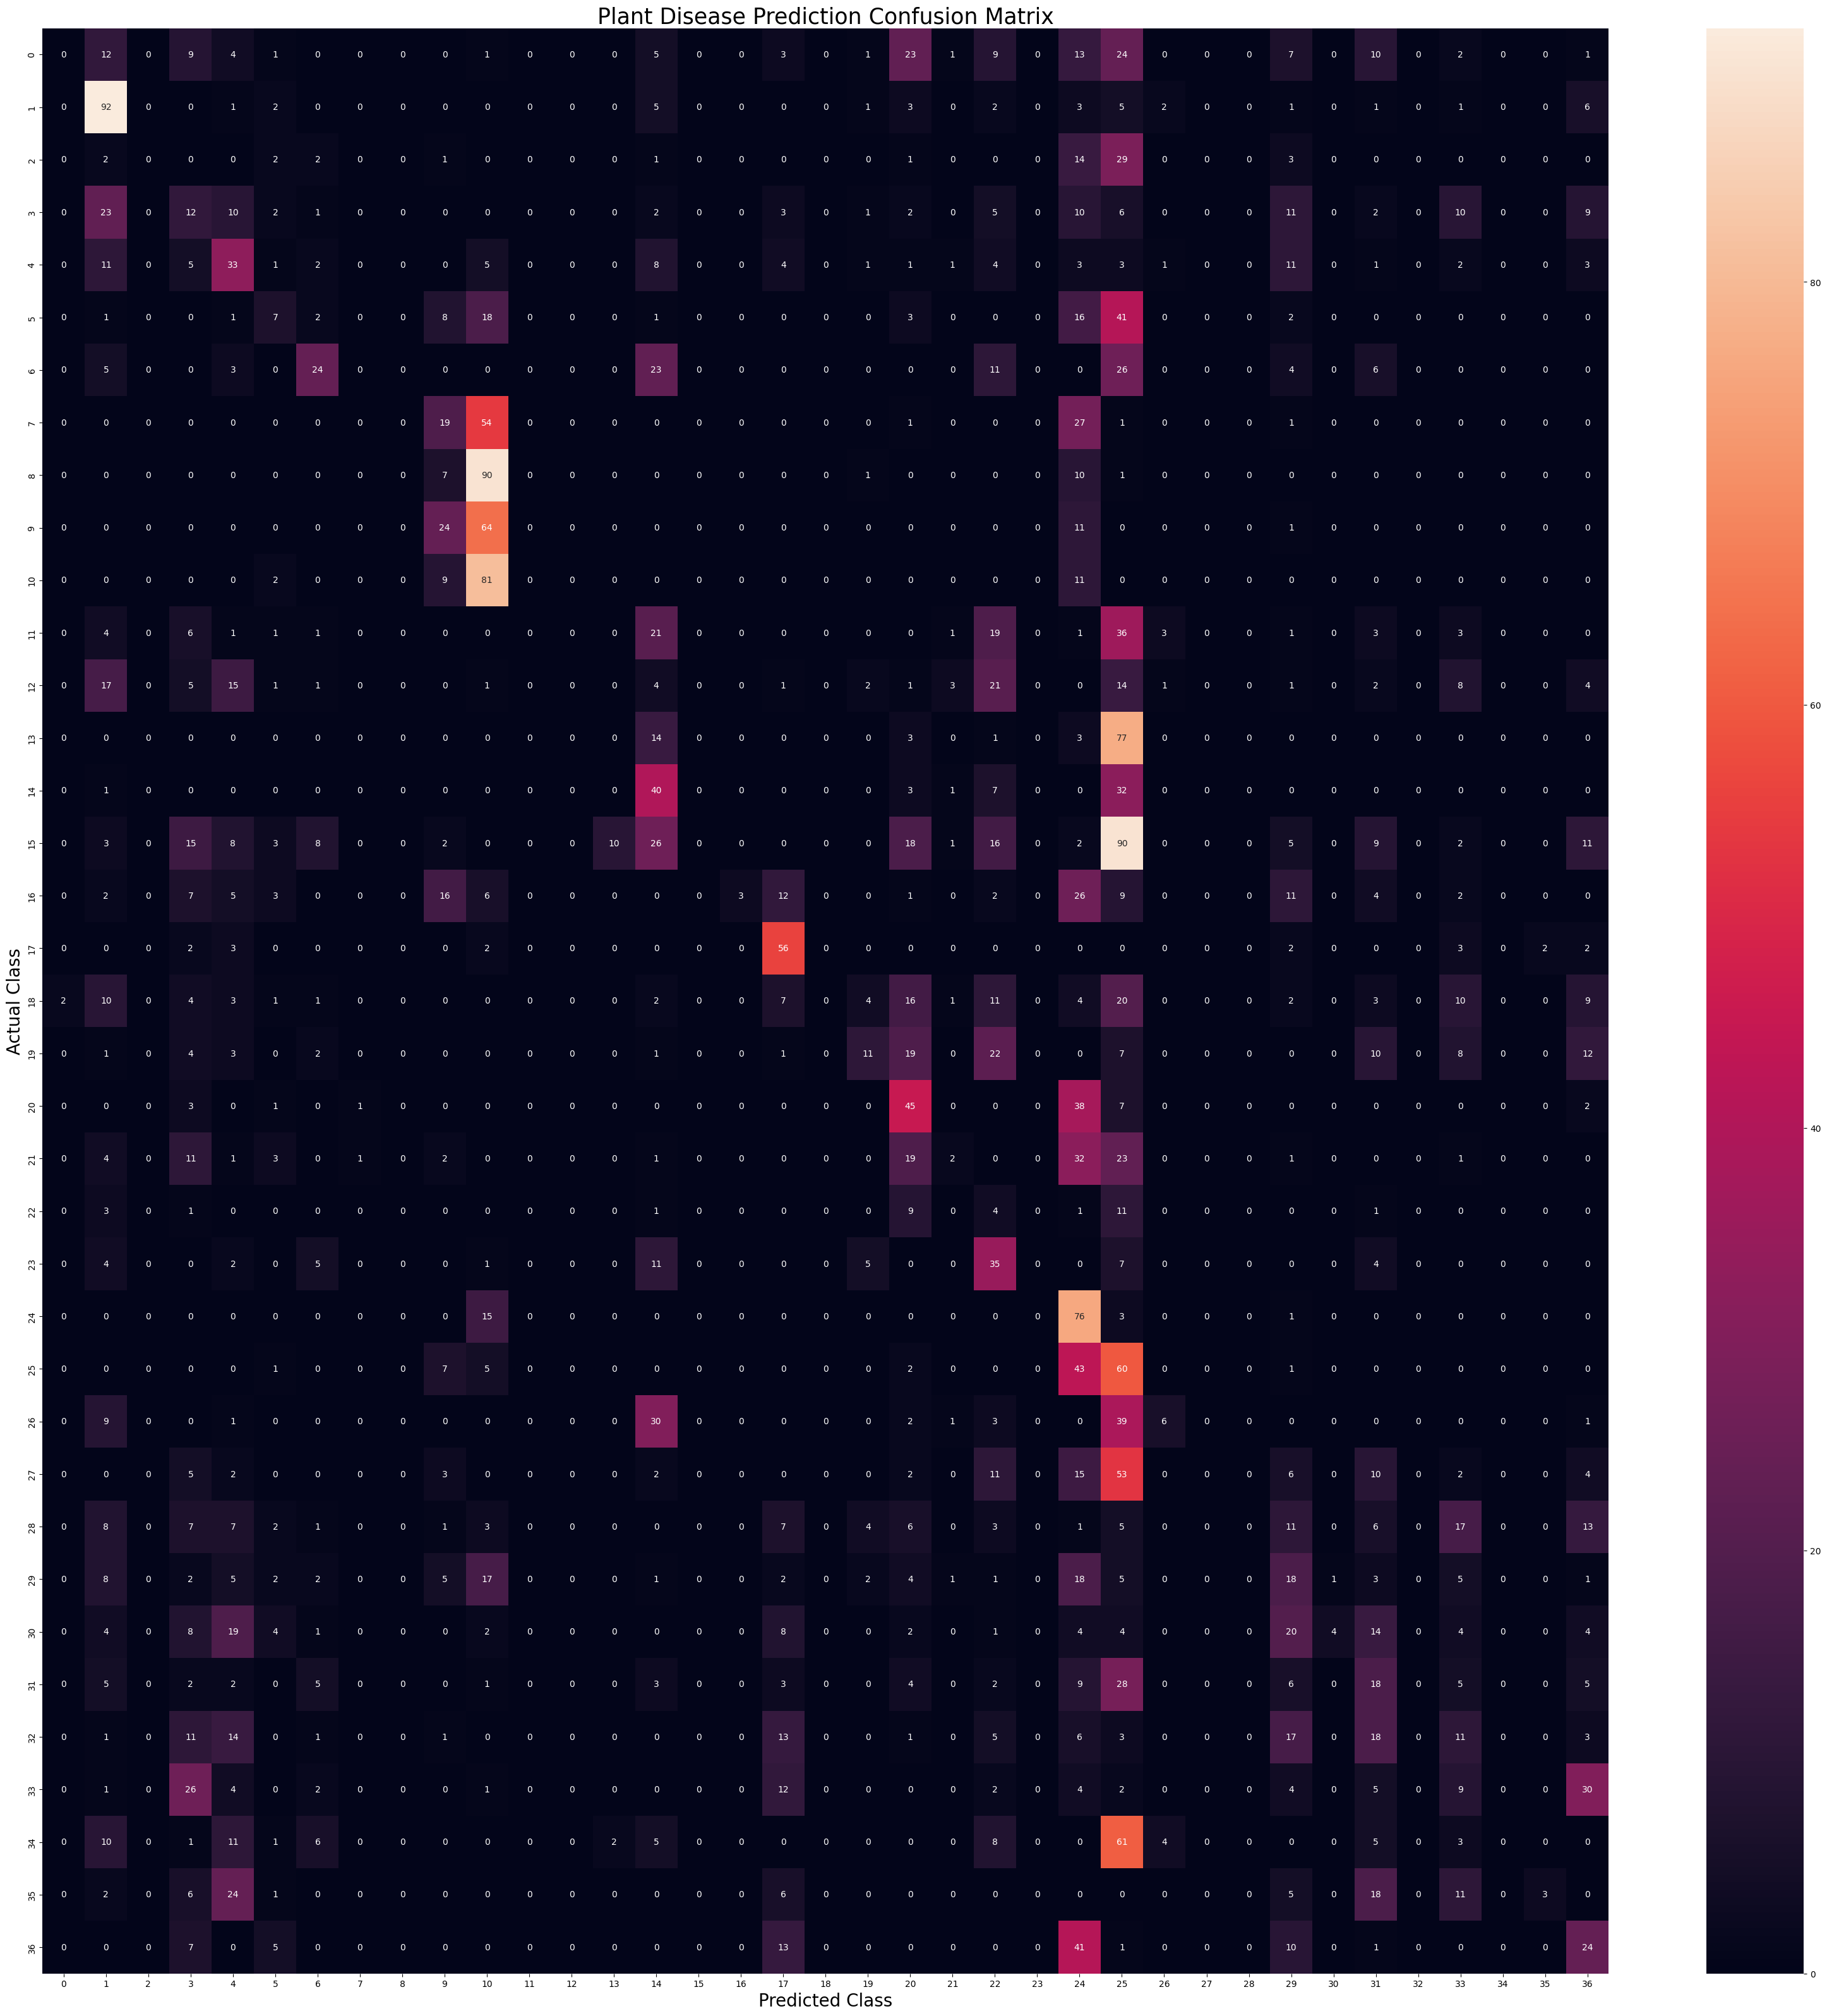

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Access class names correctly
class_names = validation_set.class_names
print(class_names)


Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [ ]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

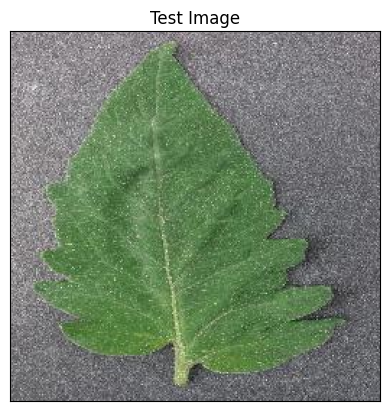

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Correcting the file path by enclosing it in quotes
image_path = "/content/drive/MyDrive/val/Tomato___healthy/01f98912-9627-4ce0-8f0f-e451b7acbb6c___RS_HL 0509.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])  # Hides the x-axis ticks
plt.yticks([])  # Hides the y-axis ticks
plt.show()


### **TEXT MODEL**

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

24


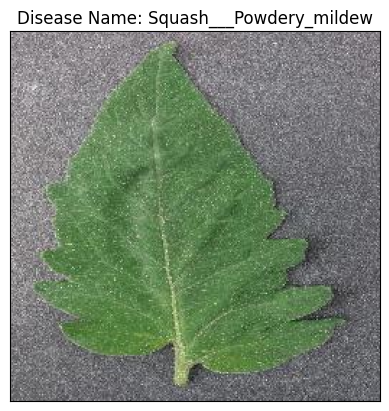

In [ ]:
# Displaying the disease prediction
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 241ms/step - accuracy: 0.1719 - loss: 3.2901 - val_accuracy: 0.1605 - val_loss: 4.6950
Epoch 2/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.3592 - loss: 2.2860 - val_accuracy: 0.3727 - val_loss: 2.3201
Epoch 3/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.5010 - loss: 1.7029 - val_accuracy: 0.4451 - val_loss: 1.9712
Epoch 4/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.5767 - loss: 1.4324 - val_accuracy: 0.5615 - val_loss: 1.5572
Epoch 5/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.6450 - loss: 1.1526 - val_accuracy: 0.3928 - val_loss: 2.7145
Epoch 6/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.6766 - loss: 1.0290 - val_accuracy: 0.5610 - val_loss: 1.6178
Epoch 7/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.7358 - loss: 0.8489 - val_accuracy: 0.6716 - val_loss: 1.2147
Epoch 8/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.7459 - loss: 0

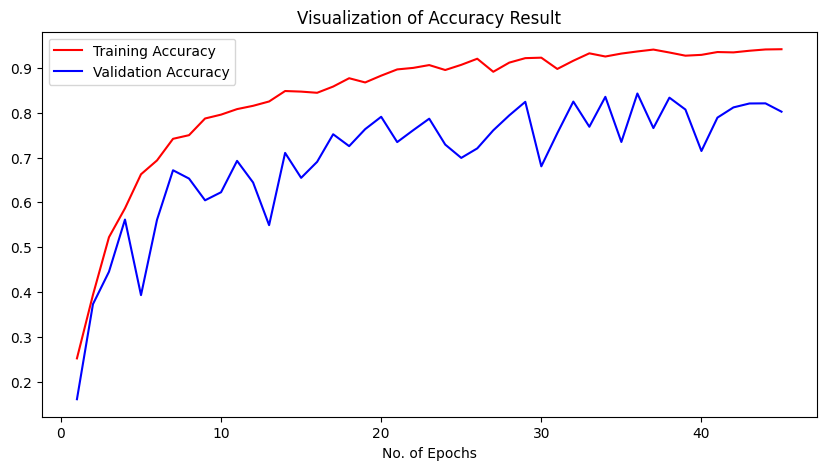

Found 3770 files belonging to 37 classes.
Test Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotte

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.11      0.97      0.20       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.00      0.00      0.00       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.18      0.36      0.24       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

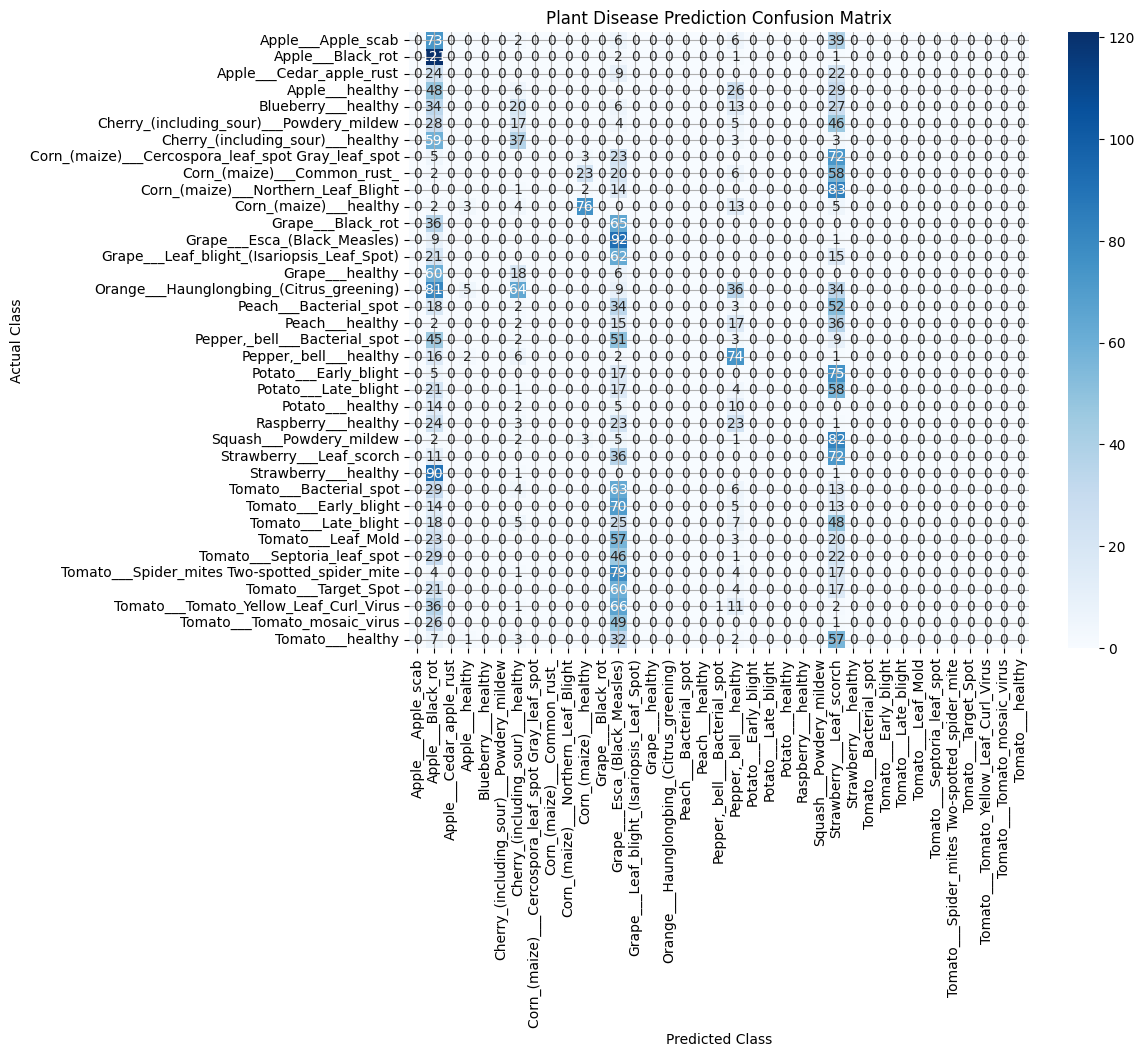

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])



normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Print class names for both training and validation sets
print("Training Set Classes:", train_dataset.class_names)

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential

cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal', input_shape=[128, 128, 3]))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1200, kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))  # Adjust for number of classes in your dataset

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=45)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)


# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Adjust this path if necessary
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print("Test Classes:", class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('Plant Disease Prediction Confusion Matrix')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(40, 40))

sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.grid(True)
plt.show()

# Compute misclassified instances per class
misclassified_counts = cm.sum(axis=1) - np.diag(cm)

# Plot a pie chart for misclassified instances
plt.figure(figsize=(8, 8))
plt.pie(misclassified_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Misclassifications Across Classes')
plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf

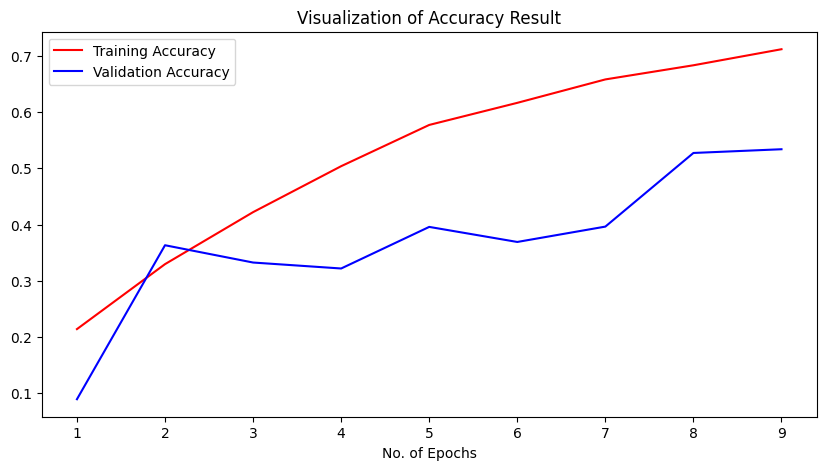

Found 3770 files belonging to 37 classes.
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.39      0.37      0.38       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.00      0.00      0.00       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.12      0.06      0.08       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

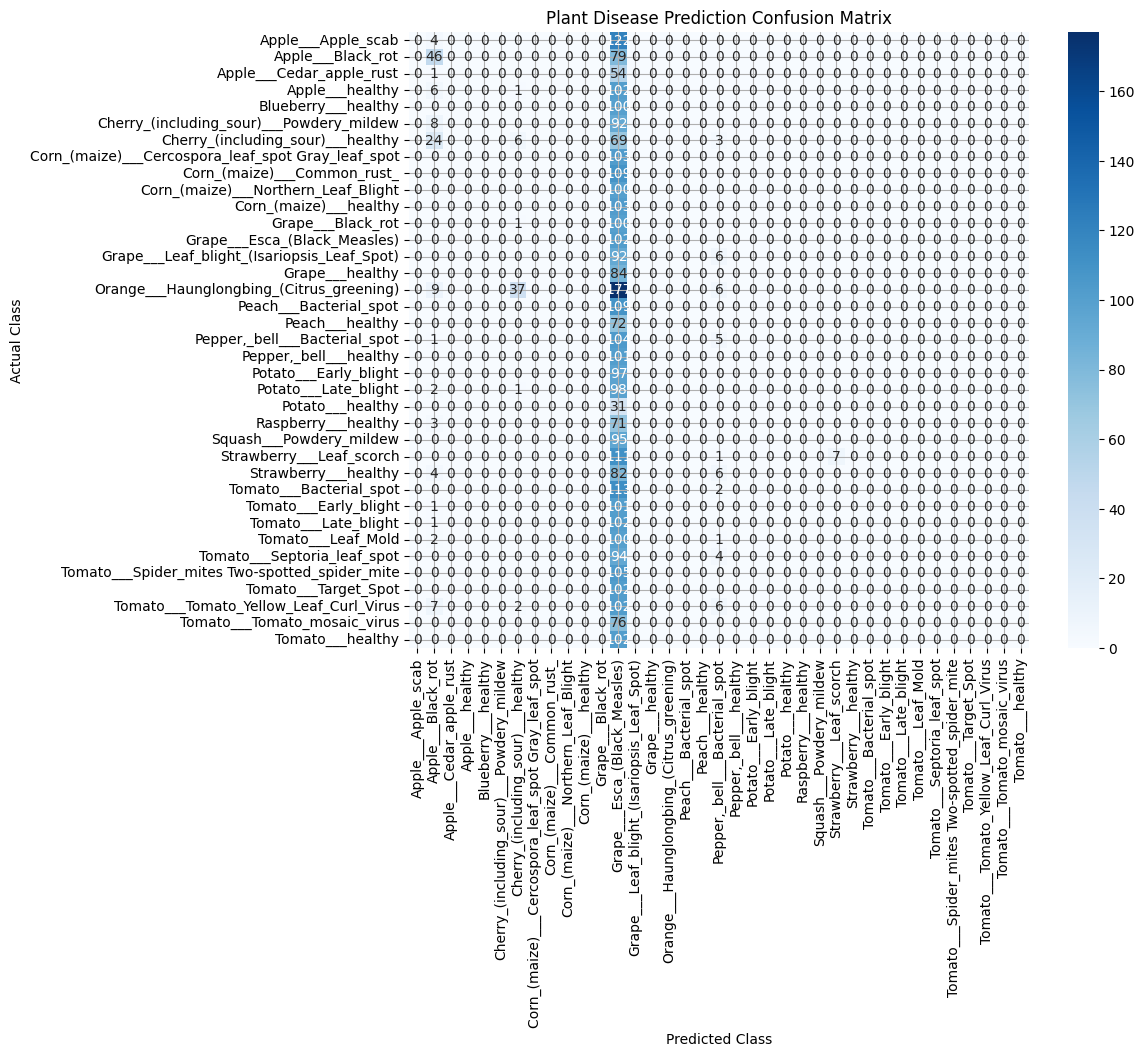

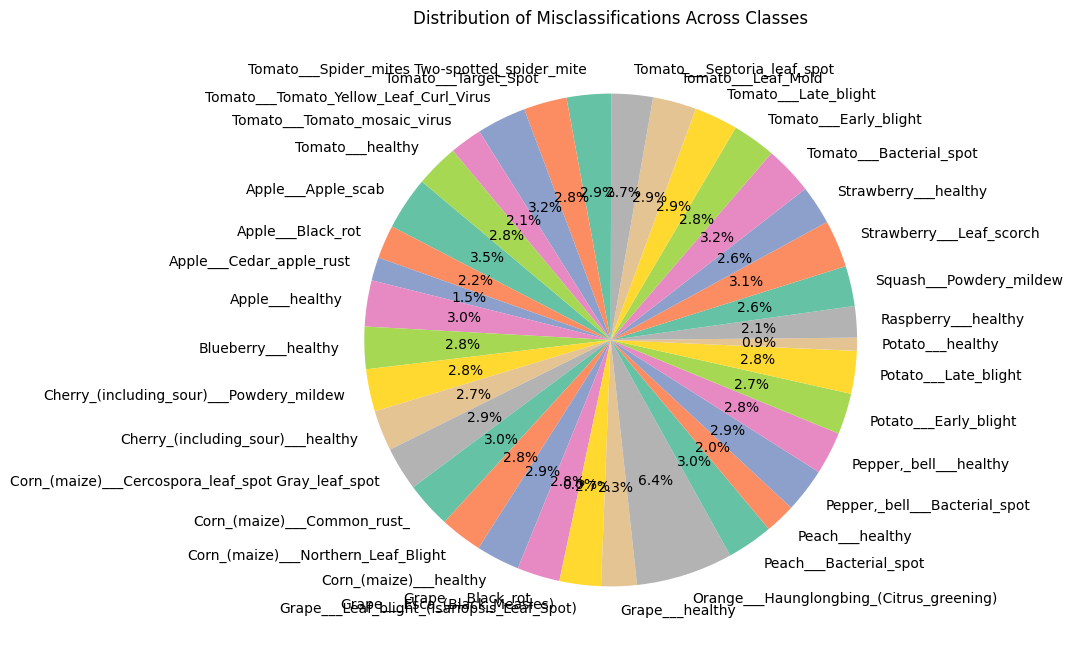

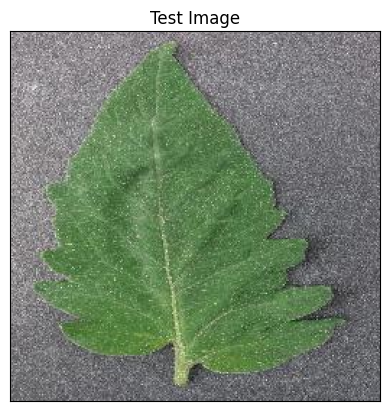

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Class Index: 12


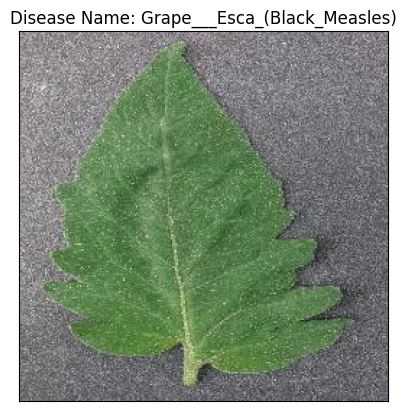

In [ ]:
# Import required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report

# Data Augmentation & Normalization
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])

normalization_layer = Rescaling(1./255)

# Load training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset before mapping to retain class names
original_validation_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Retrieve class names BEFORE mapping
class_names = original_validation_set.class_names
print("Class Names:", class_names)

# Apply data augmentation & normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
validation_set = original_validation_set.map(lambda x, y: (normalization_layer(x), y))

# Define CNN model
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal', input_shape=[128, 128, 3]))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1200, kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Dropout(0.4))

# Output Layer
cnn.add(Dense(units=len(class_names), activation='softmax'))  # Adjusted for dynamic class count

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=validation_set, epochs=9)

# Evaluate the model on training & validation set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Load trained model
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Plant Disease Prediction Confusion Matrix')
plt.grid(True)
plt.show()

# Compute misclassified instances per class
misclassified_counts = cm.sum(axis=1) - np.diag(cm)

# Plot a pie chart for misclassified instances
plt.figure(figsize=(8, 8))
plt.pie(misclassified_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Misclassifications Across Classes')
plt.show()

# Load and preprocess an image for single prediction
image_path = "/content/drive/MyDrive/val/Tomato___healthy/1b855a60-d30c-4ed9-8f25-cffe523b436b___GH_HL Leaf 249.1.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess image for prediction
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format

# Make prediction
predictions = cnn.predict(input_arr)
print(predictions)

# Get predicted class index
result_index = np.argmax(predictions)
print(f"Predicted Class Index: {result_index}")

# Display the disease prediction
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 227ms/step - accuracy: 0.1583 - loss: 3.4668 - val_accuracy: 0.1064 - val_loss: 4.5547
Epoch 2/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.2958 - loss: 2.5726 - val_accuracy: 0.3408 - val_loss: 2.3429
Epoch 3/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.4307 - loss: 2.0637 - val_accuracy: 0.3218 - val_loss: 2.6285
Epoch 4/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.4880 - loss: 1.7772 - val_accuracy: 0.3613 - val_loss: 2.6617
Epoch 5/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.5456 - loss: 1.5282 - val_accuracy: 0.4459 - val_loss: 2.0778
Epoch 6/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.6052 - loss: 1.2839 - val_accuracy: 0.4942 - val_loss: 1.9087
Epoch 7/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.6376 - loss: 1.1786 - val_accuracy: 0.4785 - val_loss: 1.9571
Epoch 8/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.6729 - loss: 1

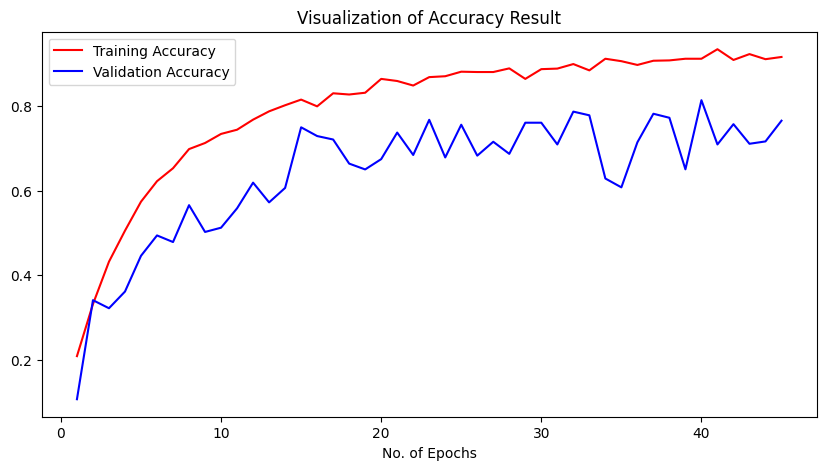

Found 3770 files belonging to 37 classes.
Test Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotte

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.03      1.00      0.07       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.00      0.00      0.00       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

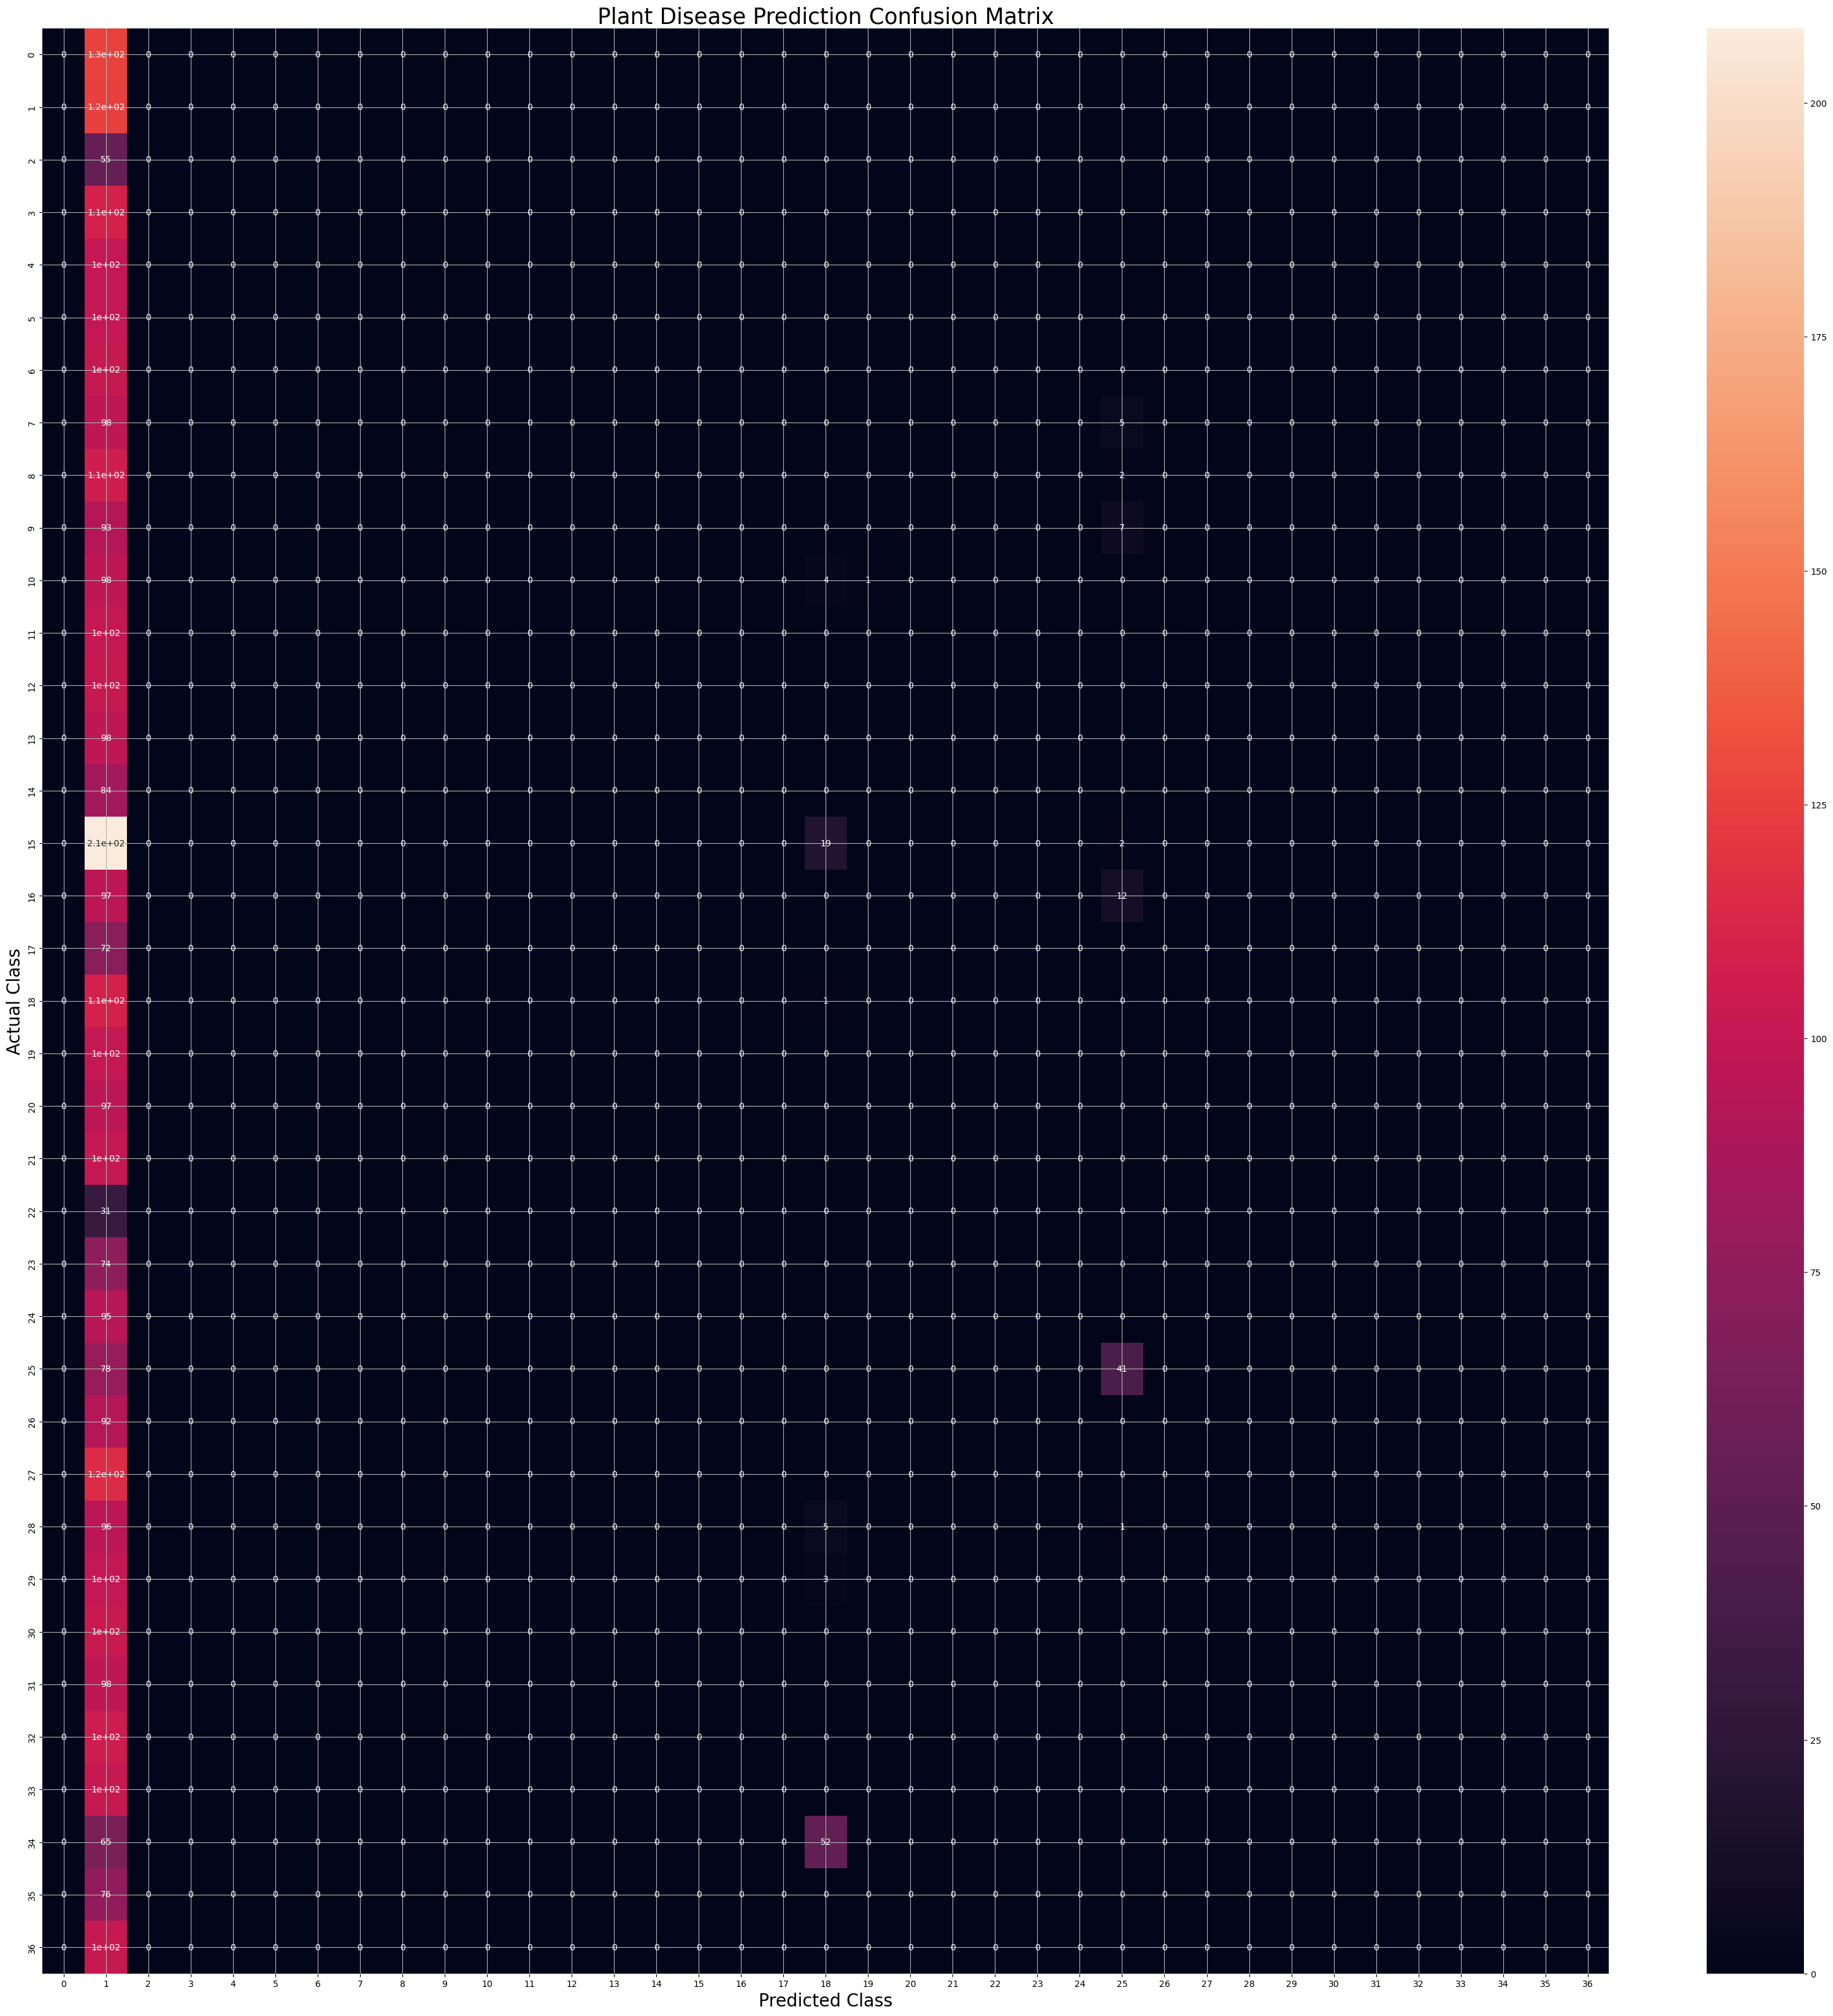

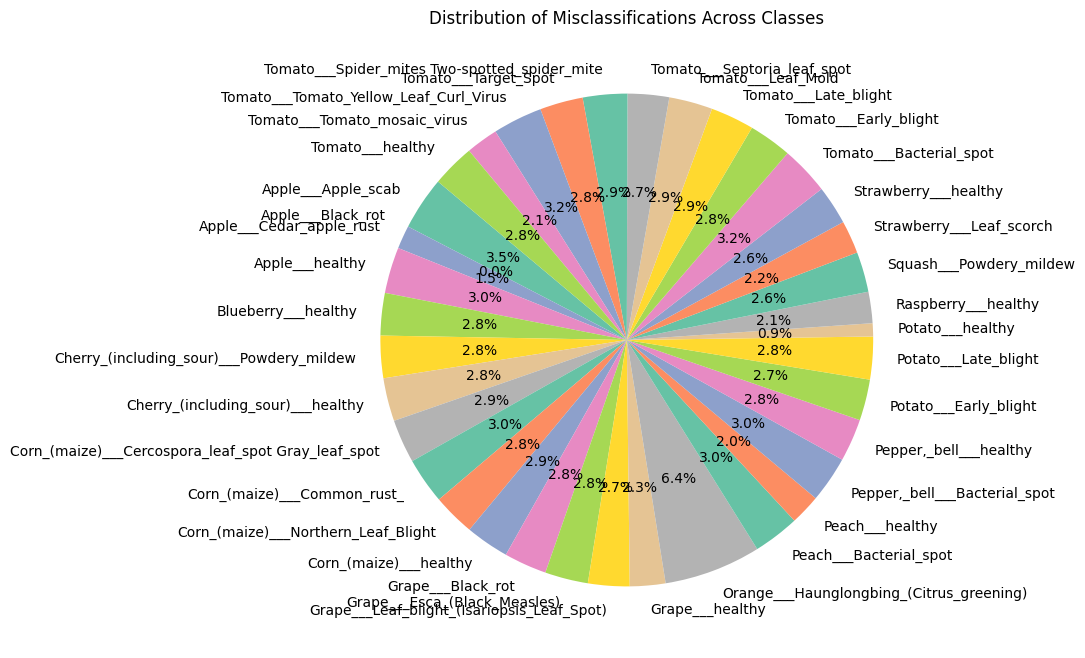

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])



normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Print class names for both training and validation sets
print("Training Set Classes:", train_dataset.class_names)

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential

cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal', input_shape=[128, 128, 3]))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1200, kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))  # Adjust for number of classes in your dataset

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=45)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)


# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Adjust this path if necessary
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print("Test Classes:", class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('Plant Disease Prediction Confusion Matrix')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(40, 40))

sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.grid(True)
plt.show()

# Compute misclassified instances per class
misclassified_counts = cm.sum(axis=1) - np.diag(cm)

# Plot a pie chart for misclassified instances
plt.figure(figsize=(8, 8))
plt.pie(misclassified_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Misclassifications Across Classes')
plt.show()


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomTranslation, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
    RandomTranslation(height_factor=0.1, width_factor=0.1),
])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Print class names
print("Training Set Classes:", train_dataset.class_names)

# Apply data augmentation & normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# Define CNN Model with Regularization and Dropout
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential

cnn = Sequential()

# Layer 1
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal',
               kernel_regularizer=l2(0.001), input_shape=[128, 128, 3]))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.3))  # Increased Dropout

# Layer 2
cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.3))

# Layer 3
cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.4))  # Increased Dropout

# Fully Connected Layers
cnn.add(Flatten())
cnn.add(Dense(units=600, kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Dropout(0.5))  # Increased Dropout for better regularization

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))  # Adjust for number of classes

# Compile Model with Lower Learning Rate
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# **Early Stopping Callback** (Stops training if val_loss increases for 5 epochs)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=50, callbacks=[early_stopping])

# Evaluate Model
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training Accuracy:', train_acc)

val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation Accuracy:', val_acc)

# Save Model
cnn.save('trained_plant_disease_model.keras')

# **Plot Accuracy Results**
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# **Confusion Matrix & Pie Chart**
from sklearn.metrics import confusion_matrix, classification_report

# Load Test Set
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Make Predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get True Labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=test_set.class_names))

# **Plot Confusion Matrix**
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_names, yticklabels=test_set.class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

# **Misclassification Pie Chart**
misclassified_counts = cm.sum(axis=1) - np.diag(cm)

plt.figure(figsize=(8, 8))
plt.pie(misclassified_counts, labels=test_set.class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Misclassifications Across Classes')
plt.show()


Found 3064 images belonging to 37 classes.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/valid'

Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 62s 368ms/step - accuracy: 0.0273 - loss: 6.4104 - val_accuracy: 0.0292 - val_loss: 5.5016 - learning_rate: 0.0010
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.0221 - loss: 5.6689 - val_accuracy: 0.0268 - val_loss: 5.2034 - learning_rate: 0.0010
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.0234 - loss: 5.1897 - val_accuracy: 0.0265 - val_loss: 4.6191 - learning_rate: 0.0010
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 254ms/step - accuracy: 0.0219 - loss: 4.7748 - val_accuracy: 0.0265 - val_loss: 4.3583 - learning_rate: 0.0010
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 28s 229ms/step - accuracy: 0.0256 - loss: 4.5380 - val_accuracy: 0.0271 - val_loss: 4.1554 - learning_rate: 0.0010
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.0342 - loss: 4.3071 - val_accuracy: 0.0170 - val_loss: 3.9991 - learning_rate: 0.0010
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.0294 - loss:

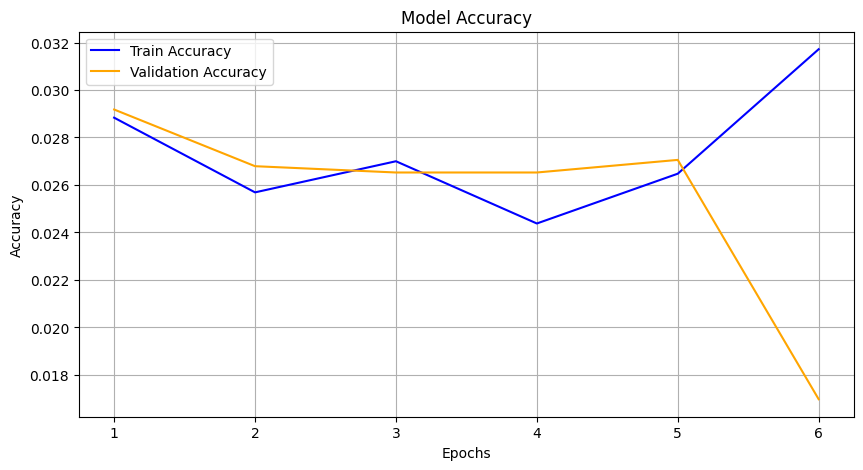

Found 3770 files belonging to 37 classes.
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.00      0.00      0.00       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.00      0.00      0.00       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

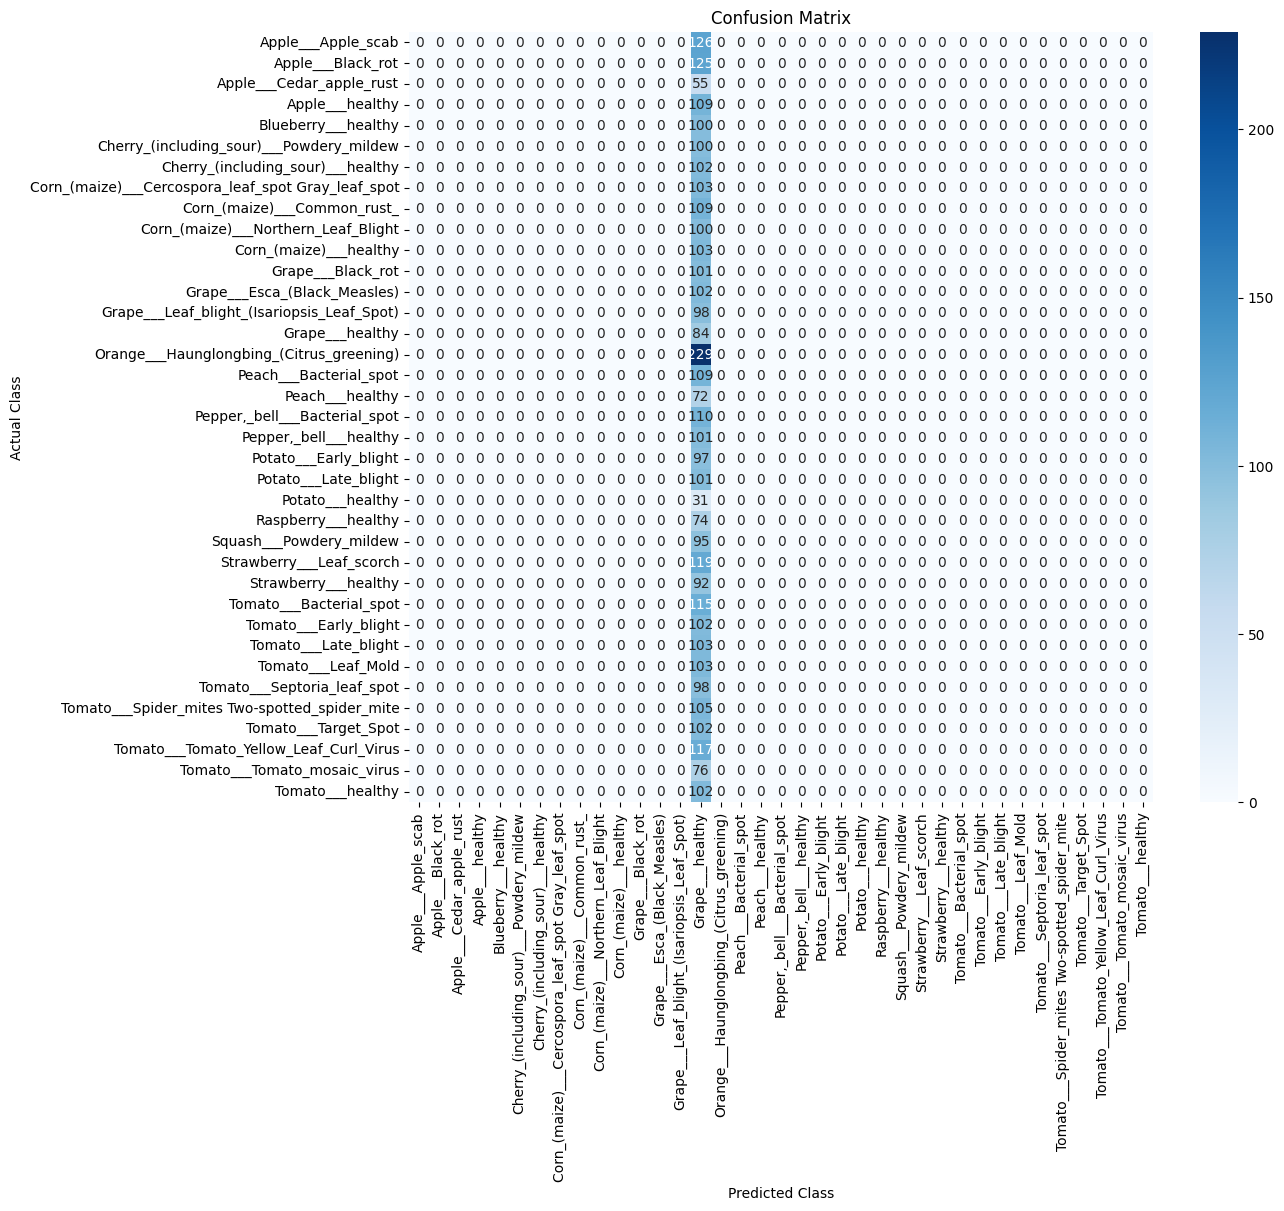

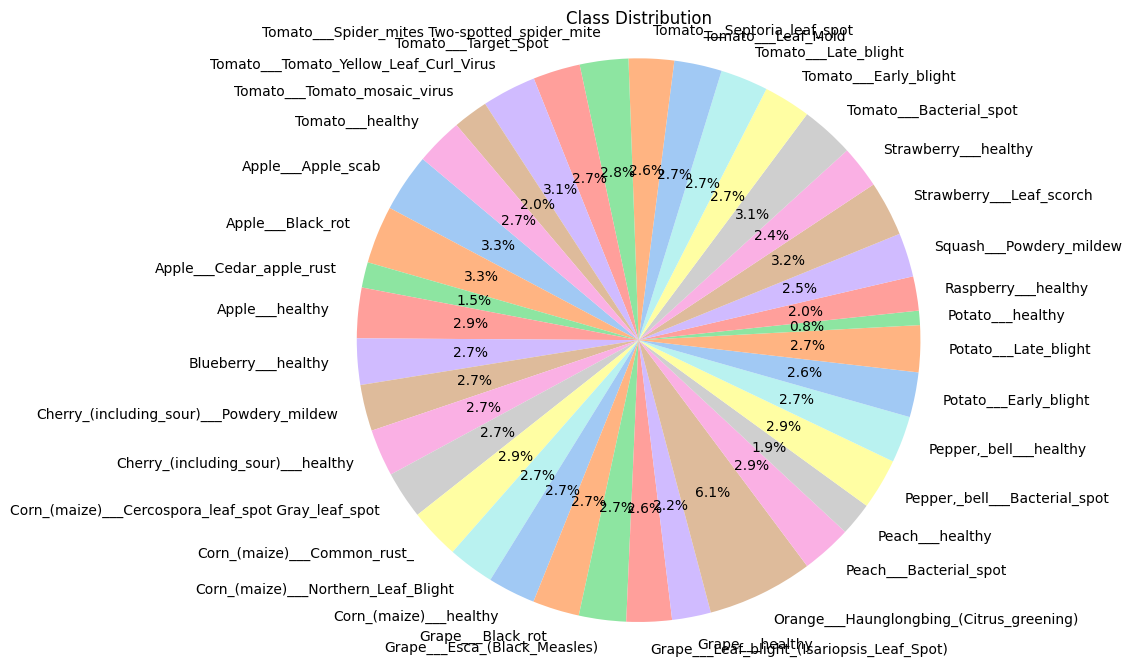

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import (RandomFlip, RandomRotation, RandomZoom,
                                     RandomContrast, RandomBrightness, RandomShear,
                                     Rescaling, Conv2D, MaxPool2D, Flatten,
                                     Dense, Dropout, BatchNormalization, LeakyReLU, GlobalAveragePooling2D)
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# 🔹 Enhanced Data Augmentation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.3),
    RandomZoom(0.3),
    RandomContrast(0.2),
    RandomBrightness(0.2),
    RandomShear(0.2),
    tf.keras.layers.GaussianNoise(0.05)  # Adding noise for robustness
])

# 🔹 Normalization Layer
normalization_layer = Rescaling(1./255)

# 🔹 Load Training Dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# 🔹 Load Validation Dataset
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# 🔹 Print class names
print("Training Classes:", train_dataset.class_names)

# 🔹 Apply Data Augmentation & Normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# 🔥 Optimized CNN Model
cnn = Sequential()

# Block 1
cnn.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001), input_shape=[128, 128, 3]))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))

# Block 2
cnn.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

# Block 3
cnn.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

# Replace Flatten with Global Average Pooling
cnn.add(GlobalAveragePooling2D())

# Fully Connected Layers
cnn.add(Dense(512, kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Dropout(0.4))

# Output Layer
cnn.add(Dense(37, activation='softmax'))

# 🔹 Compile the Model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# 🔥 Callbacks: Reduce Learning Rate & Early Stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# 🔹 Train the Model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40,
                           batch_size=32, callbacks=[lr_scheduler, early_stopping])

# 🔹 Evaluate Model Performance
train_loss, train_acc = cnn.evaluate(train_dataset)
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Training accuracy:', train_acc)
print('Validation accuracy:', val_acc)

# 🔹 Save Model
cnn.save('trained_plant_disease_model.keras')

# 📊 Plot Accuracy & Loss
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['accuracy'], color='blue', label='Train Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 📊 Confusion Matrix & Classification Report
# Load Test Dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names

# Get Predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get True Labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Generate Confusion Matrix
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# 📊 Plot Pie Chart of Class Distribution
class_counts = np.sum(cm, axis=1)  # Sum of actual class instances
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

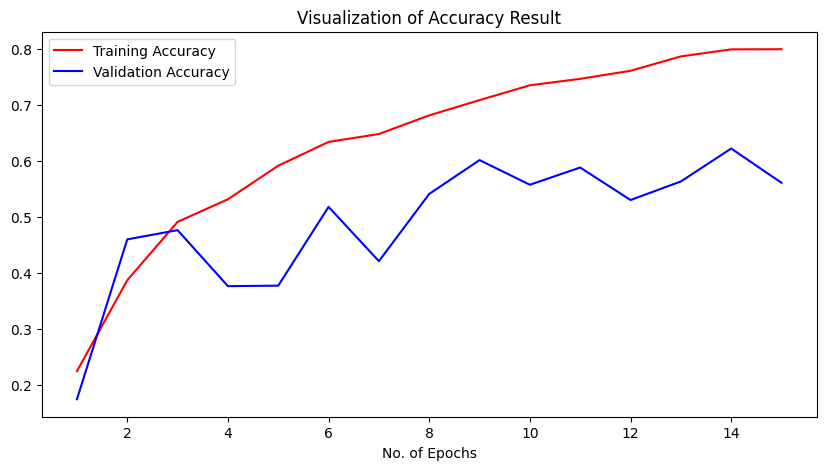

Found 3770 files belonging to 37 classes.
Test Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotte

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.07      0.87      0.13       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.00      0.00      0.00       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

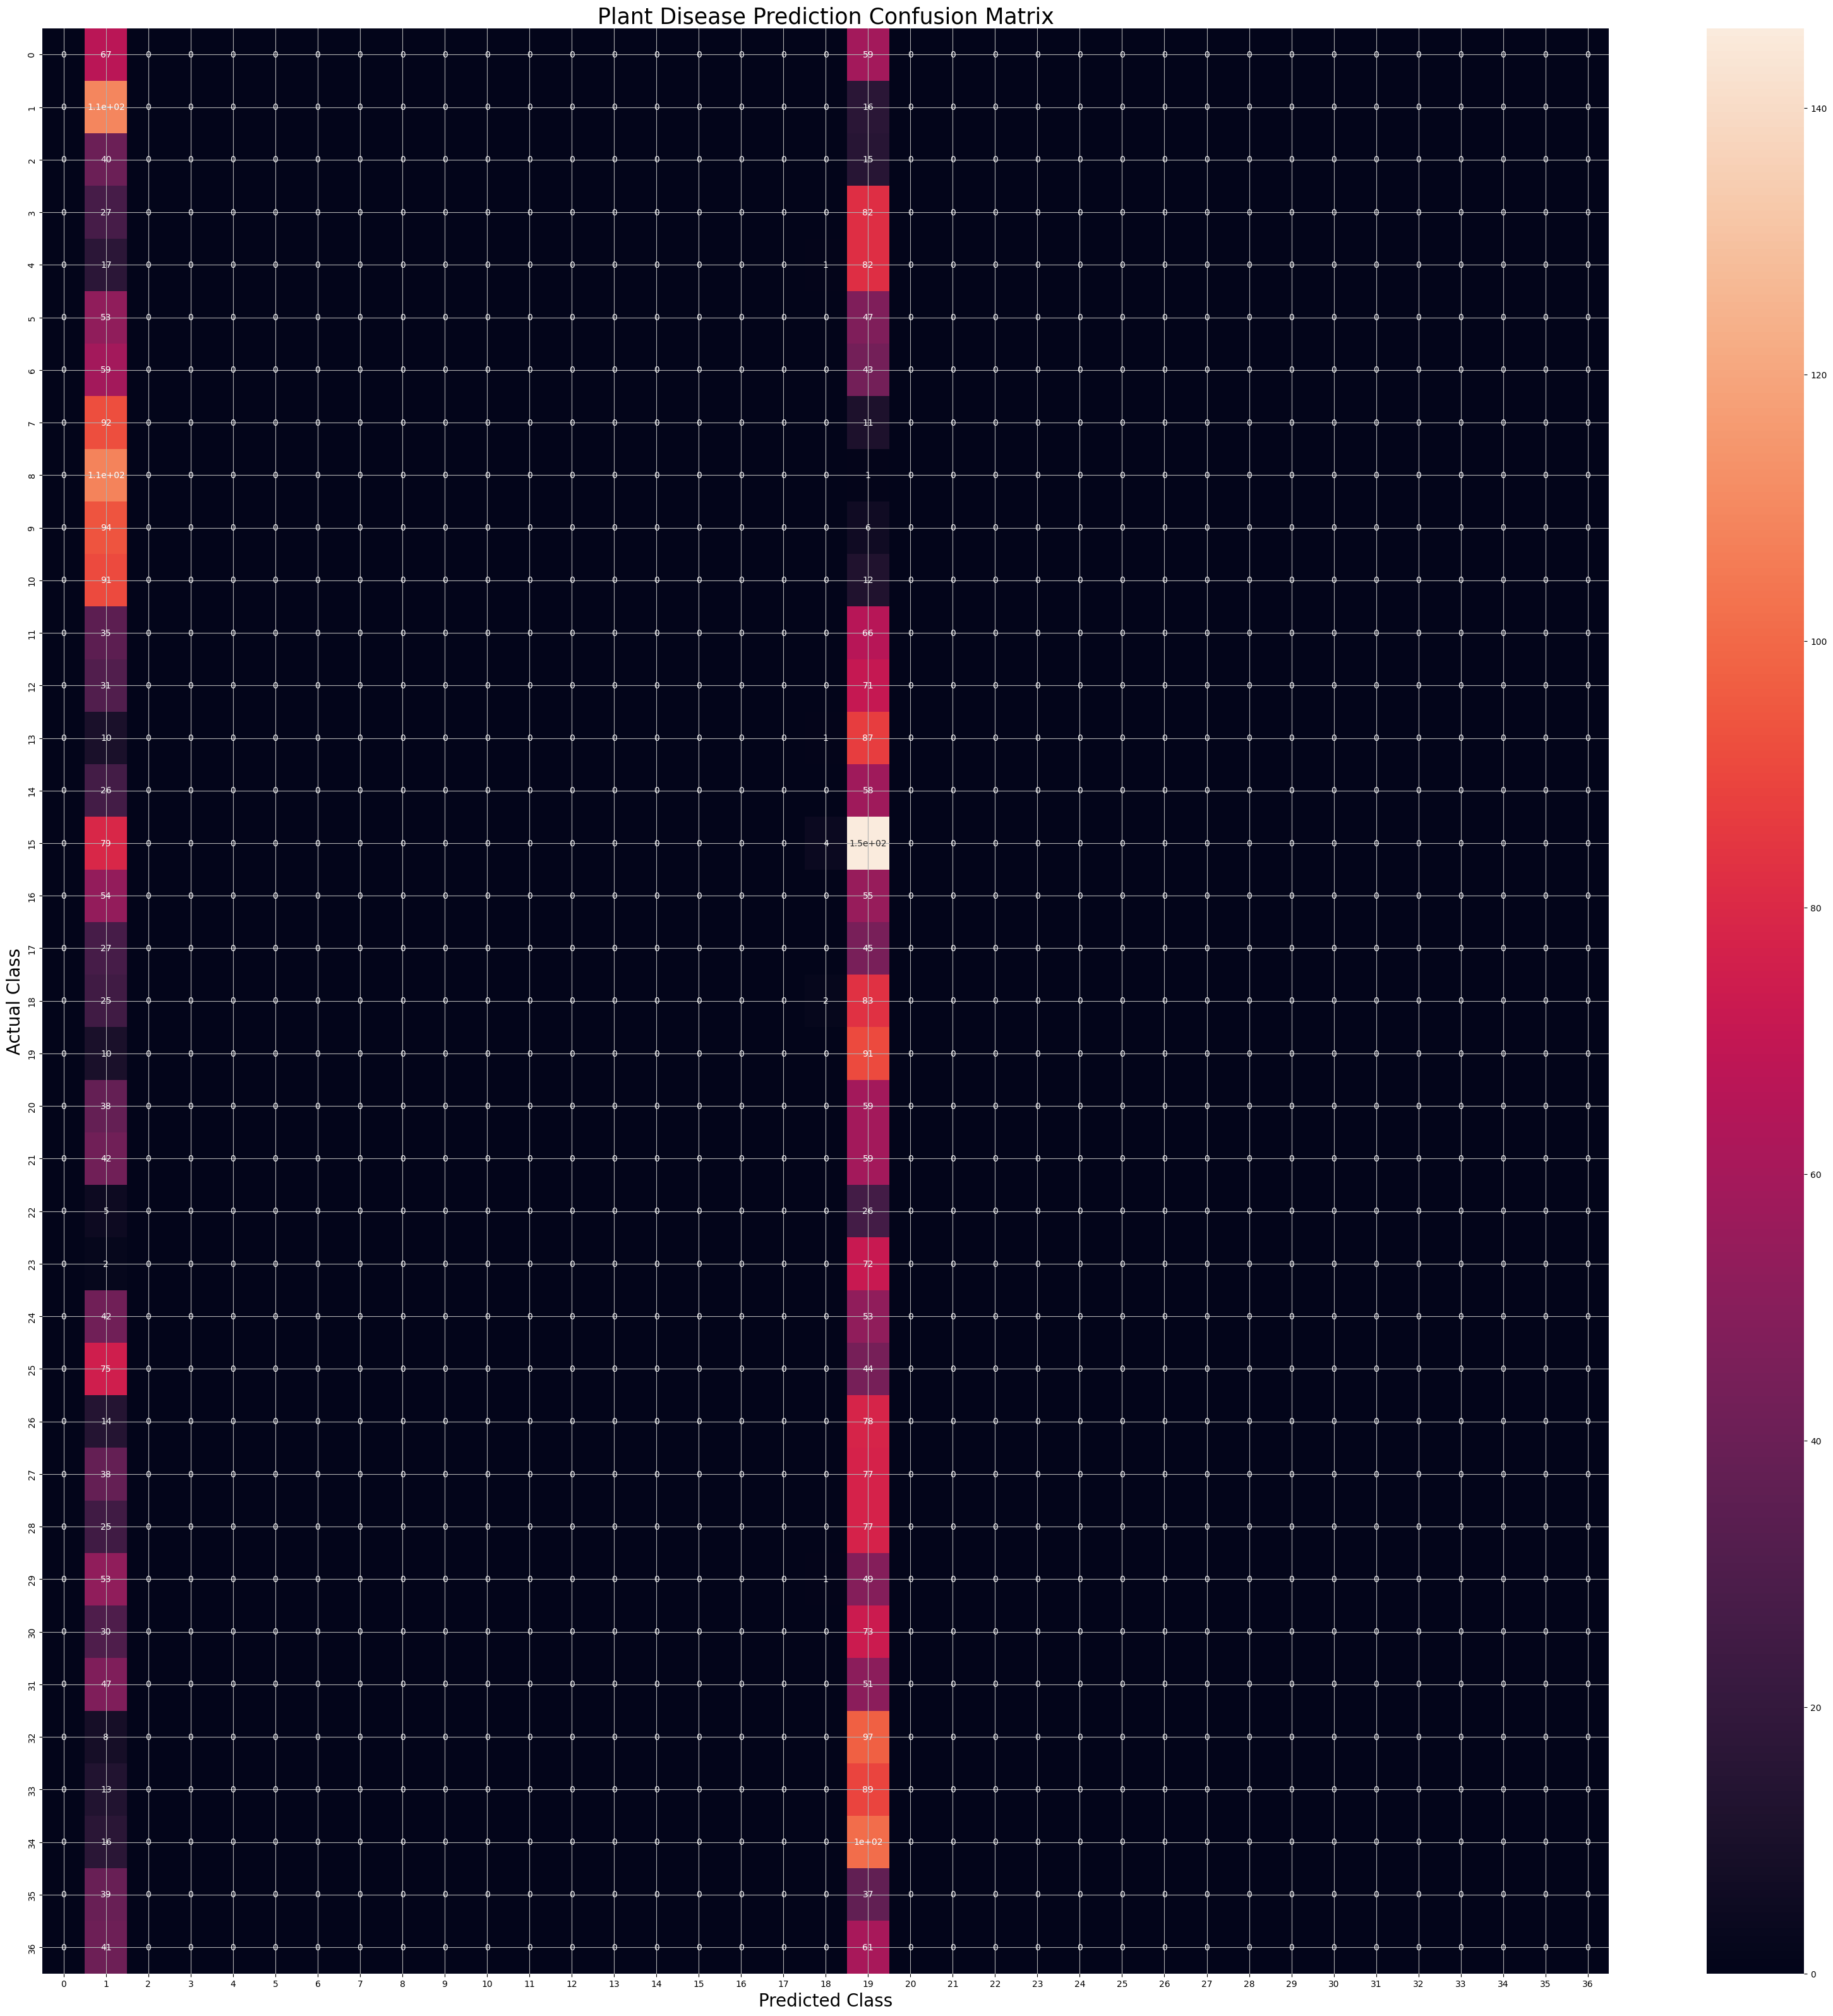

NameError: name 'np' is not defined

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])



normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=16,
    image_size=(128, 128),
    shuffle=False
)

# Print class names for both training and validation sets
print("Training Set Classes:", train_dataset.class_names)

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential

cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal', input_shape=[128, 128, 3]))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D(pool_size=2, strides=2))


cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=512, kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Dropout(0.5))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))  # Adjust for number of classes in your dataset

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=15)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)


# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Adjust this path if necessary
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print("Test Classes:", class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('Plant Disease Prediction Confusion Matrix')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(40, 40))

sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.grid(True)
plt.show()

# Compute misclassified instances per class
misclassified_counts = cm.sum(axis=1) - np.diag(cm)

# Plot a pie chart for misclassified instances
plt.figure(figsize=(8, 8))
plt.pie(misclassified_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Misclassifications Across Classes')
plt.show()


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])



normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Print class names for both training and validation sets
print("Training Set Classes:", train_dataset.class_names)

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential

cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal', input_shape=[128, 128, 3]))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(MaxPool2D(pool_size=2, strides=2))


cnn.add(Dropout(0.4))
cnn.add(Flatten())
cnn.add(Dense(units=512, kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Dropout(0.5))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))  # Adjust for number of classes in your dataset

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=15)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)


# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Adjust this path if necessary
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print("Test Classes:", class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('Plant Disease Prediction Confusion Matrix')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(40, 40))

sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.grid(True)
plt.show()

# Compute misclassified instances per class
misclassified_counts = cm.sum(axis=1) - np.diag(cm)

# Plot a pie chart for misclassified instances
plt.figure(figsize=(8, 8))
plt.pie(misclassified_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Misclassifications Across Classes')
plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
 18/120 ━━━━━━━━━━━━━━━━━━━━ 4:20 3s/step - accuracy: 0.0479 - loss: 4.2545

KeyboardInterrupt: 